In [1]:
import sys
sys.path.append('/Users/kvirk/devel/')
#
import os
import numpy as np
from scipy import special as sp
import pickle
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#
import vsh
from simulator import emops as em
import pickle

In [2]:
vsh.__VERSION__

1.0

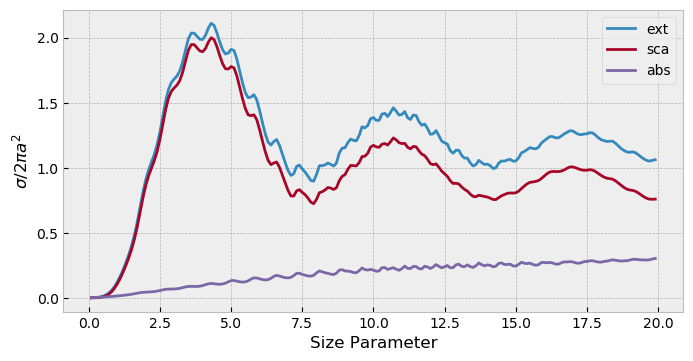

In [3]:
k0=2*np.pi
nrat=1.5 + 1j*0.01
R = np.arange(0.1, 20, 0.1)/k0

maxL = 30
sext = np.asarray([vsh.sigma_ext(maxL,nrat,k0, radius) for radius in R])/(2*np.pi*R**2)
ssca = np.asarray([vsh.sigma_sca(maxL,nrat,k0, radius) for radius in R])/(2*np.pi*R**2)

with plt.style.context('bmh'):
    fig,ax=plt.subplots(dpi=100,figsize=(8,4))
    ax.plot(k0*R,sext,label='ext')
    ax.plot(k0*R,ssca,label='sca')
    ax.plot(k0*R,sext-ssca,label='abs')
    ax.set_xlabel('Size Parameter')
    ax.set_ylabel('$\sigma/2\pi a^2$')
    ax.legend()
#

In [56]:
from matplotlib.animation import FuncAnimation
def makeplot(E,x,y,z):
    fig,axs=plt.subplots(figsize=(10,5),dpi=100,ncols=3,nrows=2)
    for i in range(3):
        ax=axs[0]
        im=ax[i].pcolor(x,z,E[i].real,cmap='jet')
        fig.colorbar(im, ax=ax[i],orientation='vertical')
        ax[i].set_aspect('equal')
        #
        ax=axs[1]
        im=ax[i].pcolor(x,z,E[i].imag,cmap='jet')
        fig.colorbar(im, ax=ax[i],orientation='vertical')
        ax[i].set_aspect('equal')
    #
    fig.tight_layout()
#
def oneplot(ax,f,x,z,cmap='RdBu_r',vmin=None,vmax=None):
    p = ax.pcolor(x,z,f,cmap=cmap,vmin=vmin,vmax=vmax)
    ax.set_aspect('equal')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    return p

In [150]:
!time python test_fields.py

saved files

real	0m4.294s
user	0m4.572s
sys	0m1.975s


In [48]:
#!time python test_fields.py
(E,Eo,Eint,EI),R = pickle.load(open('temp_fields.pkl','rb'))
x,y,z=[c.squeeze() for c  in R]
E = E.squeeze()
Eo = Eo.squeeze()
EI = EI.squeeze()
Eint = Eint.squeeze()
I = em.vecmag_abs(E, axis=0).squeeze()
I.shape,x.shape

((101, 101), (101, 101))

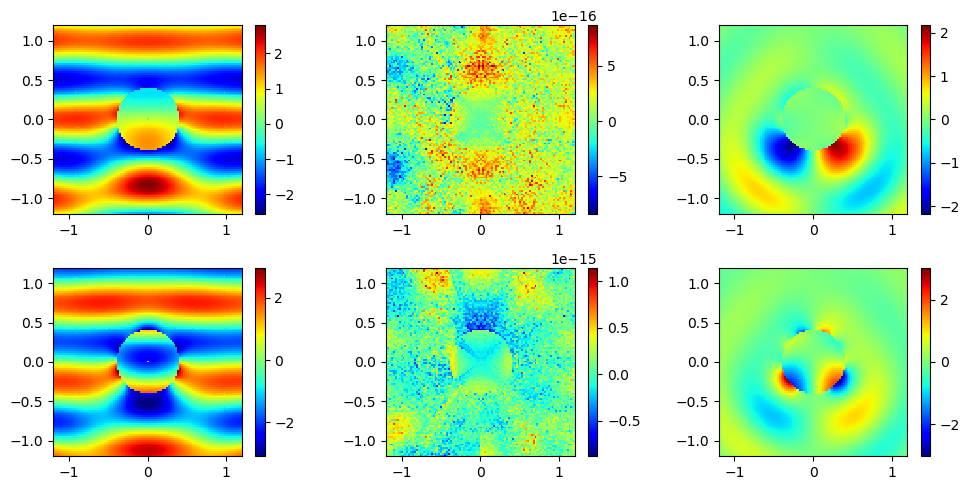

In [20]:
makeplot((E+EI+Eo)*np.exp(1j*0),x,y,z)

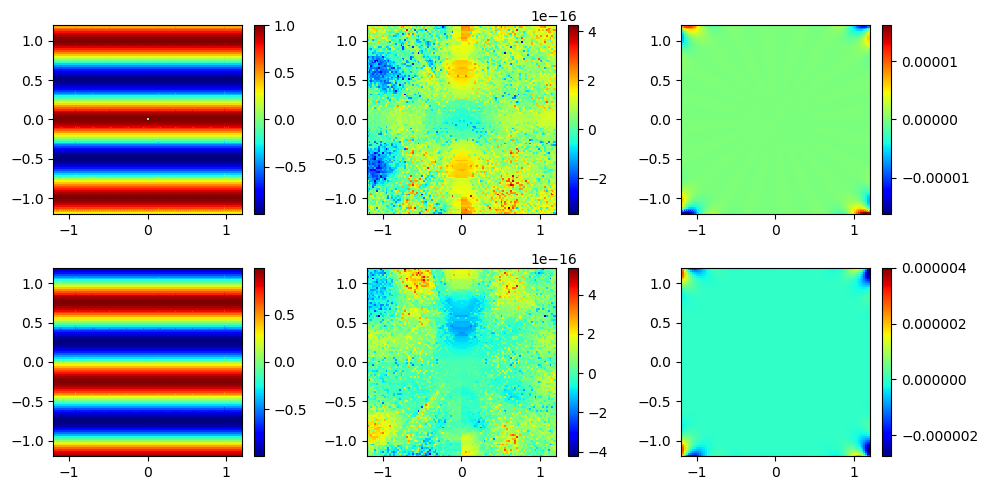